In [2]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\hrith\AppData\Local\Temp\pip-install-3r91fww9\tensorflow-gpu_648f80a254ab422c8ff52f46139543fe\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil

In [3]:
import os 
import pandas as pd
import tensorflow as tf
import numpy as np


In [4]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge' , 'train.csv','train.csv'))

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()
df.iloc[3]['comment_text']

'"\r\nMore\r\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [7]:
#PreProcessing

In [8]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
aiofiles                     23.2.1
altair                       4.2.0
anyio                        3.7.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-generator              1.10
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.5
blis                         0.7.9
bs4                          0.0.1
cachetools                   5.0.0
catalogue                    2.0.8
certifi                      2021.10.8
cffi                         1.15.1
charset-normalizer           2.0.12
click                        8.1.3
cmake                        3.27.1
colorama                     0.4.5
commonmark                   0.9.1
confection                   0

In [9]:

from tensorflow import keras 
from keras import layers
from keras.layers import TextVectorization


In [10]:
#Text Vectorization process
#here seperating the dataset in two variable the all comments into X and all the labels into Y
X = df['comment_text']
y = df[df.columns[2:]].values
Max_Feature= 150000 #number of words into our vocab

In [11]:
df['comment_text']

0         Explanation\r\nWhy the edits made under my use...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\r\nMore\r\nI can't make any real suggestions...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \r\n\r\nThat...
159568    Spitzer \r\n\r\nUmm, theres no actual article ...
159569    And it looks like it was actually you who put ...
159570    "\r\nAnd ... I really don't think you understa...
Name: comment_text, Length: 159571, dtype: object

In [12]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [13]:
#Text Vectorization process
vectorizer = TextVectorization(max_tokens=Max_Feature, output_sequence_length=1800,output_mode='int')

In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorizer('Helllo world i am good')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([  1, 261,   8,  74,  98], dtype=int64)>

In [17]:
vectorizer.get_vocabulary()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 5: unexpected end of data

In [18]:
vectorized_text  = vectorizer(X.values)

#Tensorflow Data Pipeline

In [19]:
# Dataset pipeline --- map , cache , shuffle,batch,prefetch

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

Although relu is better than tanh but while using a Lstm architecture we should always use Tanh as activation function for optimal result.

In bidirectional LSTM we give the input from both the directions from right to left and from left to right . Make a note this is not a backward propagation this is only the input which is given from both the side

In [22]:
model = Sequential()
# create the embedding layer
model.add(Embedding(Max_Feature+1,32)) #first layer in the nn is embedding layer it helps in creating personality test per word
model.add(Bidirectional(LSTM(32, activation='tanh')))# Although relu is better than
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))



In [23]:
model.compile(loss='BinaryCrossentropy' , optimizer='Adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          4800032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [26]:
history = model.fit(train , epochs=1 , validation_data = val)

6981/6981 [==============================] - 3473s 497ms/step - loss: 0.0624 - val_loss: 0.0464


<Figure size 576x360 with 0 Axes>

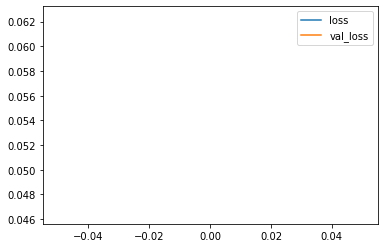

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
# Make Prediction

In [28]:
batch = test.as_numpy_iterator().next()

In [29]:
batch_x , batch_y = test.as_numpy_iterator().next()

In [30]:
input_text =vectorizer('You freaking suck! I am going to hurt you')

In [31]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [32]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [33]:
(model.predict(batch_x) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [34]:
res = model.predict(np.expand_dims(input_text , 0))

Evaluate model

In [35]:
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [38]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.813847541809082, Recall:0.6990088820457458, Accuracy:0.4704112410545349


In [40]:
!pip install gradio jinja2


In [42]:
import tensorflow as tf
from typing_extensions import deprecated

import gradio as gr

In [43]:
model.save('toxicity.h5')


In [44]:
model = tf.keras.models.load_model('toxicity.h5')


In [45]:
input_str = vectorizer('hey i freaken hate you!')


In [46]:
res = model.predict(np.expand_dims(input_str,0))


In [47]:
res

array([[0.86600375, 0.02435529, 0.41285384, 0.02085379, 0.40476704,
        0.07529905]], dtype=float32)

In [49]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text


In [50]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\hrith\AppData\Local\Temp\ipykernel_1572\2358991581.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\hrith\AppData\Local\Temp\ipykernel_1572\2358991581.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\hrith\AppData\Local\Temp\ipykernel_1572\2358991581.py:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [51]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://9bcf04ebc515d263ef.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
